In [2]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
train_scaled = train_input / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

In [3]:
def model_fn(a_layer=None):
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=(28, 28)))
    model.add(keras.layers.Dense(100, activation='relu'))

    if a_layer:
        model.add(a_layer)

    model.add(keras.layers.Dense(10, activation='softmax'))

    return model


In [4]:
model = model_fn()
model.summary()

C:\Users\2-22\Desktop\DMF\ML\venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape        ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ flatten (Flatten)         │ (None, 784)         │          0 │
├───────────────────────────┼─────────────────────┼────────────┤
│ dense (Dense)             │ (None, 100)         │     78,500 │
├───────────────────────────┼─────────────────────┼────────────┤
│ dense_1 (Dense)           │ (None, 10)          │      1,010 │
└───────────────────────────┴─────────────────────┴────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_scaled, train_target, epochs=5, verbose=0)

In [8]:
history.history.keys()

dict_keys(['accuracy', 'loss'])

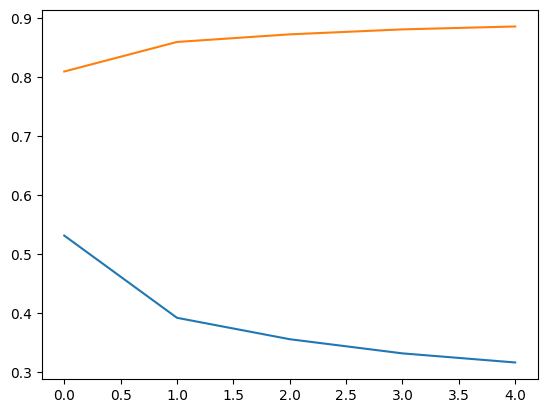

In [9]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.show()

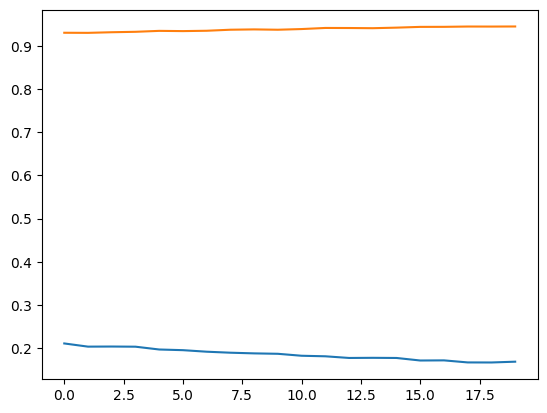

In [11]:
# epochs 조절
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_scaled, train_target, epochs=20, verbose=0)

plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.show()

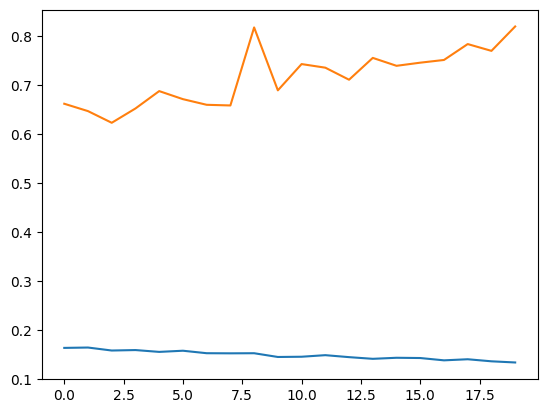

In [12]:
# validation_data: 검증
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target))

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
# plt.plot(history.history['accuracy'])
plt.show()

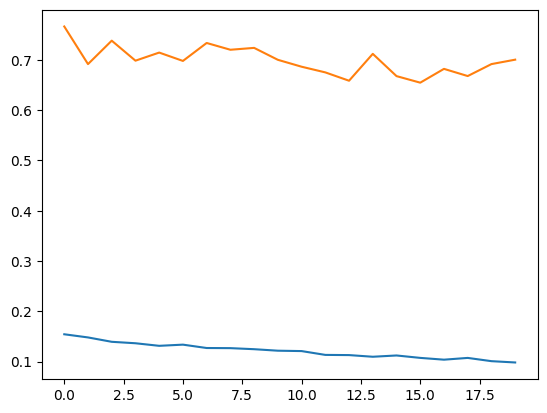

In [13]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target))

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
# plt.plot(history.history['accuracy'])
plt.show()

In [15]:
model = model_fn(keras.layers.Dropout(0.3))
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape        ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ flatten_2 (Flatten)       │ (None, 784)         │          0 │
├───────────────────────────┼─────────────────────┼────────────┤
│ dense_4 (Dense)           │ (None, 100)         │     78,500 │
├───────────────────────────┼─────────────────────┼────────────┤
│ dropout_1 (Dropout)       │ (None, 100)         │          0 │
├───────────────────────────┼─────────────────────┼────────────┤
│ dense_5 (Dense)           │ (None, 10)          │      1,010 │
└───────────────────────────┴─────────────────────┴────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target))

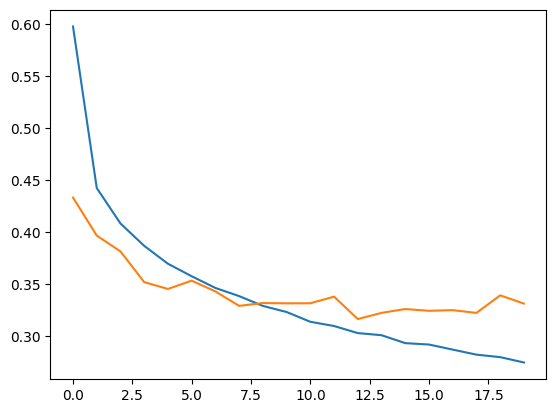

In [18]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

In [23]:
# 과대적합된 모델의 epochw=20 을 10으로 줄이면 되겠다!
# 근데 이렇게 계속 줄여서 모델 실행시키면 시간 잡아먹으니
# 모델 저장하면 됨
model.save_weights('model.weights.h5')
# 실행하면 model.weights 파일이 생김
# 모든 가중치를 파일에 저장해둔거임.

In [22]:
model.save('mymodel.keras')

### 콜백
- 훈련과정 중간에 어떤 작업을 수행할 수 있게 하는 객체
- 예)손실함수 찾아가는 중 적절한 값이 나오면 멈추게 하는

In [26]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best_model.keras', save_best_only=True)
history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target), callbacks=[checkpoint_cb])